In [ ]:
'''b. Importe (e instale en caso de ser necesario) la librería pandas.'''
import pandas as pd

## **1. Lectura y análisis exploratorio de datos**

In [ ]:
'''Cargue la base de datos de nombre ejemplo_data.csv. '''
df = pd.read_csv("/content/ejemplo_data.csv")
df.head()

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


In [ ]:
'''Identifique los tipos de variables que hay disponibles en la base de datos '''
df.dtypes

,0
ID,int64
Nombre,object
2016,object
2017,object
Crecimiento,object
Unidades,object
fecha,object
Activo,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 516.0+ bytes


In [ ]:
'''Utilice la función astype, transforme el atributo ID a entero y el atributo activo a
binario. '''

df['ID'] = df["ID"].astype(int, errors='raise')

df['Activo'] = df['Activo'].replace('n', 0)
df['Activo'] = df['Activo'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 516.0+ bytes


In [ ]:
'''Convierta el atributo unidades a entero y 2016 a flotante.'''
df['Unidades'] = df["Unidades"].replace('No',0)
df['Unidades'] = df["Unidades"].astype(int)

In [ ]:
df['2016'] = df["2016"].str.replace(r'[$,]', '', regex=True).astype(float)

In [ ]:
df.head()

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,920000.0,"$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,50000.0,62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,350000.0,490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,15000.0,$12750.00,-15.00%,0,2-15-2014,0


## **2. Estadísticas descriptivas:**

In [ ]:
'''Cree un diccionario que contenga al menos dos atributos con valores numéricos
continuos y una variable categórica.'''
import numpy as np

dicc = {
    'metros_cuadrados': np.random.uniform(40, 350, size=20),
    'precio_miles': np.random.uniform(50, 500, size=20),
    'zona': np.random.choice(['Urbana', 'Rural', 'Costera', 'Montaña'], size=20)
}

In [ ]:
'''Transforme dicho diccionario a un data frame de pandas.'''
df = pd.DataFrame(dicc)

In [ ]:
'''Estadísticas descriptivas generales:'''
print(df.describe())

       metros_cuadrados  precio_miles
count         20.000000     20.000000
mean         197.939223    259.513710
std           82.328188    120.996580
min           73.856164     68.002569
25%          126.214038    145.865544
50%          191.343330    261.211657
75%          274.090000    362.020432
max          346.745954    450.882764


In [ ]:
'''Obtenga y comente estadísticas descriptivas de tendencia central.'''
print( np.round(df[['metros_cuadrados', 'precio_miles']].mean(),2) )

metros_cuadrados    197.94
precio_miles        259.51
dtype: float64


En promedio, las casas tienen un área de 197.94 metros cuadrados y un precio de 259.51 mil.

In [ ]:
print(df[['metros_cuadrados', 'precio_miles']].median())

metros_cuadrados    191.343330
precio_miles        261.211657
dtype: float64


El valor central de las casas (mediana) es de 191.34 metros cuadrados y el precio central es de 261.21 mil unidades monetarias.

In [ ]:
print(df[['zona']].mode())

     zona
0  Urbana


Es mas comun una casa Urbana

In [ ]:
'''Obtenga y comente estadísticas descriptivas de dispersión'''
# Desviación estándar
print("Desviación estándar:")
print(df[['metros_cuadrados', 'precio_miles']].std())

# Varianza
print("\nVarianza:")
print(df[['metros_cuadrados', 'precio_miles']].var())

# Rango (máximo - mínimo)
print("\nRango:")
rango = df[['metros_cuadrados', 'precio_miles']].max() - df[['metros_cuadrados', 'precio_miles']].min()
print(rango)


Desviación estándar:
metros_cuadrados     82.328188
precio_miles        120.996580
dtype: float64

Varianza:
metros_cuadrados     6777.930532
precio_miles        14640.172314
dtype: float64

Rango:
metros_cuadrados    272.889790
precio_miles        382.880195
dtype: float64


- Desviacion estandar: Los precios tienen una desviación estándar mayor que los metros cuadrados, lo que sugiere una mayor variabilidad en los precios.
- Varianza: Los metros cuadrados y el precio es muy variado. Podrías encontrar casas de precios y tamaños muy variados.
- Rango: Los m2 de diferencia entre la casa más grande y más pequeña es de 272.89m2; y las diferencias entre el precio más elevado y bajo es de 382.88 mil

## **3. Transformación e imputación de datos**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/ejemplo_data2.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
'''Para las variables numéricas, genere un diagnóstico de números perdidos.'''
numeric_df = df.select_dtypes(include='number')
missing_counts = numeric_df.isna().sum()

print("Números perdidos por variable numérica:")
print(missing_counts)

Números perdidos por variable numérica:
Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64


In [ ]:
missing_percentage = (numeric_df.isna().mean() * 100).round(2)

print("Porcentajes perdidos por variable numérica:")
print(missing_percentage)

Porcentajes perdidos por variable numérica:
Rooms             0.00
Price             0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.58
Lattitude         0.00
Longtitude        0.00
Propertycount     0.00
dtype: float64


In [ ]:
'''Luego, impute los valores de acuerdo a la media y de acuerdo a otro criterio
seleccionado por usted. '''

df['Car'] = df['Car'].fillna(df['Car'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

In [ ]:
'''Finalmente, vuelva a generar el diagnóstico y verifique las imputaciones realizadas.'''
numeric_df = df.select_dtypes(include='number')
missing_counts = numeric_df.isna().sum()

print("Números perdidos por variable numérica:")
print(missing_counts)

Números perdidos por variable numérica:
Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64


In [ ]:
'''Transforme las variables categóricas a numéricas, generando una variable dummy
por cada categoría'''
categorical_df = df.select_dtypes(exclude='number').columns

encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas
encoded_features = encoder.fit_transform(df[categorical_df])

print(encoded_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# Obtener los nombres de las nuevas columnas
feature_names = encoder.get_feature_names_out(categorical_df)

df_encoded = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

df_final = pd.concat([df[numeric_df.columns], df_encoded], axis=1)

In [ ]:
df_final

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_nan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## **4. Visualización de datos**

In [1]:
'''a. Importe las librerías seaborn, matplotlib y numpy.'''
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
'''b. Cree la propia base de datos. c. A modo de experimentación, le recomendamos explorar las opciones del método y
los ejemplos disponibles en la documentación de ella.'''

mean_simple = [0, 0]  # Media de ambas variables = 0
cov_simple = [[1, 0],   # Varianza de X=1, Covarianza=0
              [0, 1]]   # Varianza de Y=1, Covarianza=0

sample_simple = np.random.multivariate_normal(mean_simple, cov_simple, 100)
print(f"Forma de los datos generados: {sample_simple.shape}")

Forma de los datos generados: (100, 2)


In [3]:
help(np.random.multivariate_normal)

Help on method multivariate_normal in module numpy.random.mtrand:

multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-08) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)

    Draw random samples from a multivariate normal distribution.

    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.

    .. note::
        New code should use the
        `~numpy.random.Generator.multivariate_normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    mean : 1-D 

In [23]:
mean = (1, 2)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (3, 3))
x

array([[[ 1.76713761,  2.49098461],
        [ 0.91183953,  4.99395328],
        [-0.97065247, -0.16981188]],

       [[ 1.61126817,  0.52664453],
        [ 1.83057813,  1.61157957],
        [ 1.98950695,  1.37228117]],

       [[ 2.3345115 ,  2.7046078 ],
        [ 1.46387088,  1.58117528],
        [ 1.79896176,  2.44259295]]])

In [31]:
'''d. Genere una base de datos que distribuya normal bivariada.'''

# Configurar la semilla para reproducibilidad
np.random.seed(42)

mean = [50, 30]  # X̄ = 50, Ȳ = 30

cov_matrix = [[25, 15],    # Var(X)=25, Cov(X,Y)=15
              [15, 20]]    # Cov(Y,X)=15, Var(Y)=20

# Generar 1000 observaciones
n_samples = 1000
data_bivariada = np.random.multivariate_normal(mean, cov_matrix, n_samples)

df_bivariada = pd.DataFrame(data_bivariada, columns=['Variable_X', 'Variable_Y'])

print(f"Forma: {df_bivariada.shape}")
print(f"\nEstadísticas descriptivas:")
print(df_bivariada.describe())

print(f"\nMatriz de correlación:")
print(df_bivariada.corr())

Forma: (1000, 2)

Estadísticas descriptivas:
        Variable_X   Variable_Y
count  1000.000000  1000.000000
mean     49.745043    29.985697
std       4.845578     4.347431
min      33.619912    16.407260
25%      46.490691    27.130435
50%      49.772113    29.954125
75%      52.971775    32.818749
max      66.974776    44.942377

Matriz de correlación:
            Variable_X  Variable_Y
Variable_X    1.000000    0.640089
Variable_Y    0.640089    1.000000


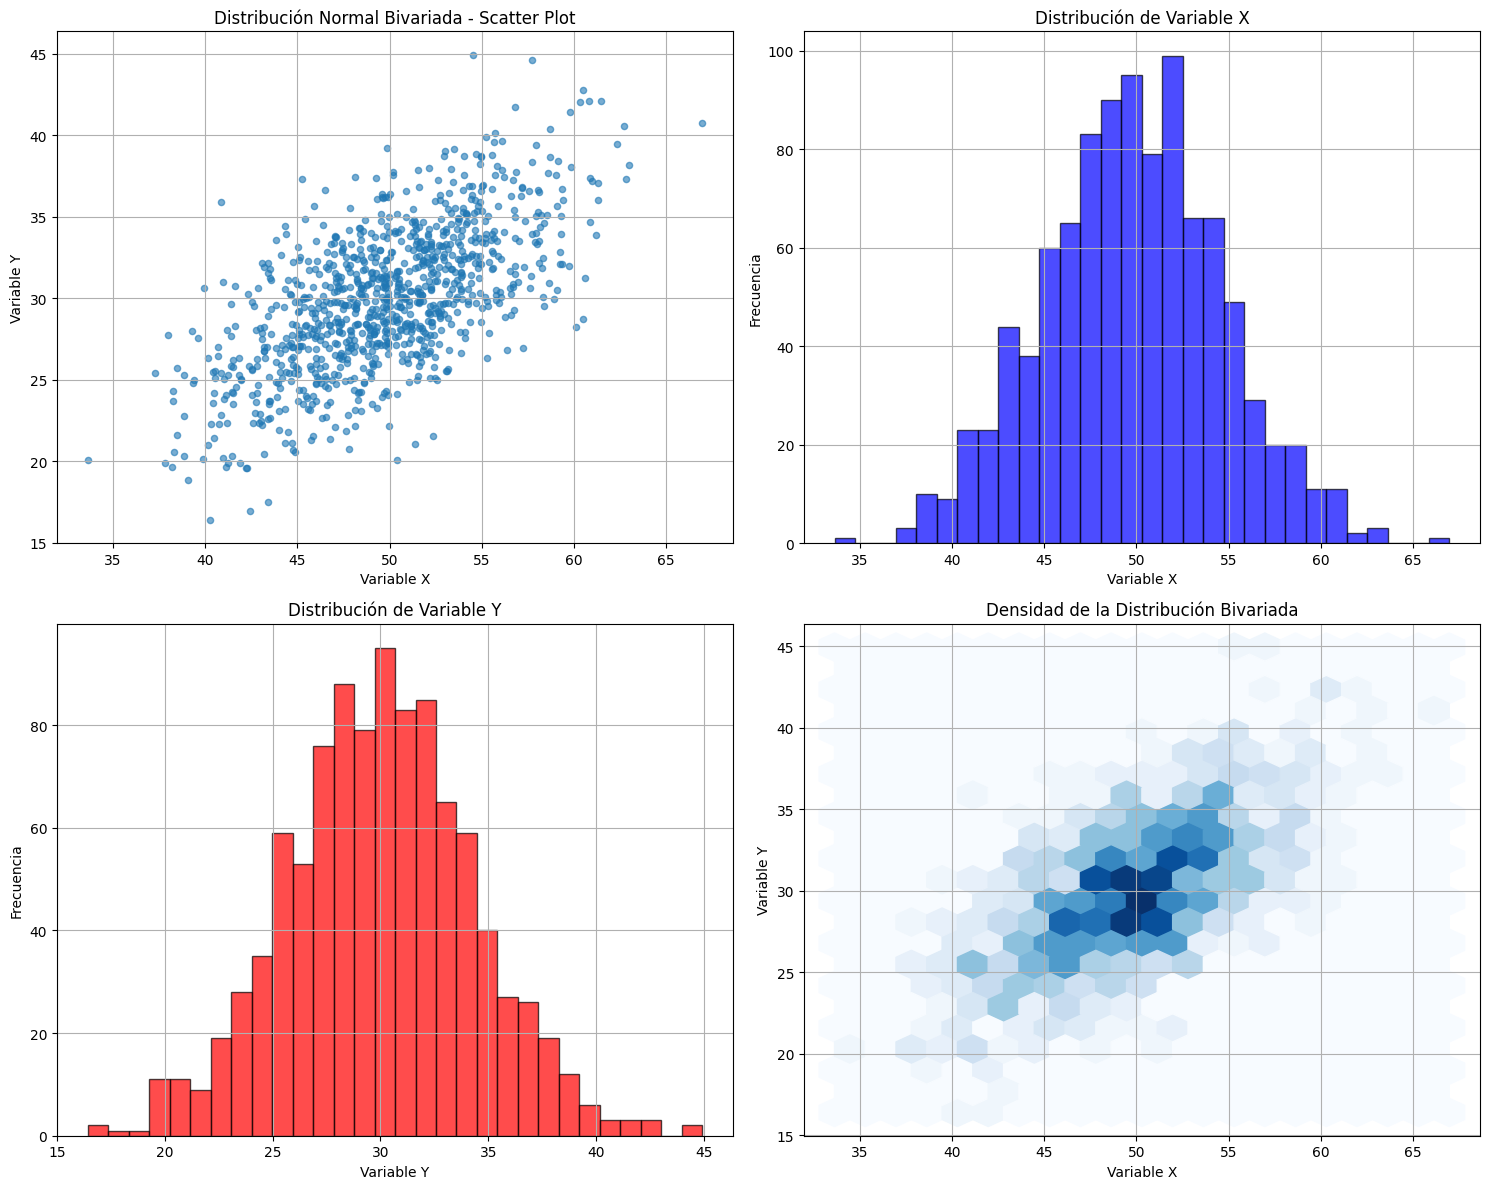

In [32]:
# Visualizar la distribución normal bivariada para entender mejor lo que estamos creando
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot de las dos variables
axes[0,0].scatter(df_bivariada['Variable_X'], df_bivariada['Variable_Y'],
                  alpha=0.6, s=20)
axes[0,0].set_xlabel('Variable X')
axes[0,0].set_ylabel('Variable Y')
axes[0,0].set_title('Distribución Normal Bivariada - Scatter Plot')
axes[0,0].grid(True)

# 2. Histograma de Variable X
axes[0,1].hist(df_bivariada['Variable_X'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].set_xlabel('Variable X')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_title('Distribución de Variable X')
axes[0,1].grid(True)

# 3. Histograma de Variable Y
axes[1,0].hist(df_bivariada['Variable_Y'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1,0].set_xlabel('Variable Y')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Variable Y')
axes[1,0].grid(True)

# 4. Mapa de calor de densidad
axes[1,1].hexbin(df_bivariada['Variable_X'], df_bivariada['Variable_Y'],
                 gridsize=20, cmap='Blues')
axes[1,1].set_xlabel('Variable X')
axes[1,1].set_ylabel('Variable Y')
axes[1,1].set_title('Densidad de la Distribución Bivariada')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

<Axes: xlabel='Variable_X', ylabel='Variable_Y'>

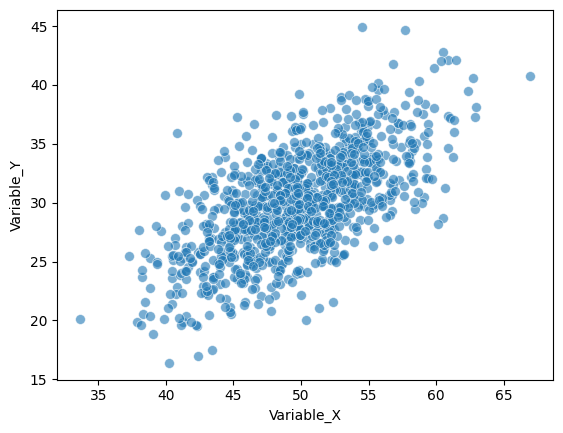

In [ ]:
'''e. Para la base de datos creada por usted, genere un gráfico de dispersión utilizando
seaborn. Explore diferentes valores para la media y covarianza'''
sns.scatterplot(data=df_bivariada, x='Variable_X', y='Variable_Y', alpha=0.6, s=50)

/tmp/ipython-input-3641323847.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data_bivariada = np.random.multivariate_normal(mean, cov_matrix, n_samples)


<Axes: xlabel='Variable_X', ylabel='Variable_Y'>

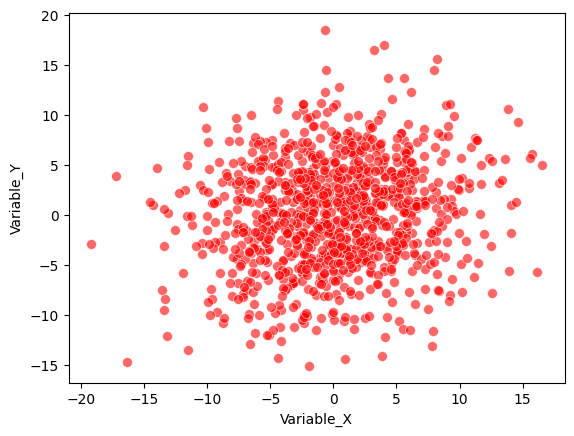

In [5]:
mean = [0, 0]  # X̄ = 50, Ȳ = 30

cov_matrix = [[5, 30],    # Var(X)=25, Cov(X,Y)=15
              [30, 5]]    # Cov(Y,X)=15, Var(Y)=20

# Generar 1000 observaciones
n_samples = 1000
data_bivariada = np.random.multivariate_normal(mean, cov_matrix, n_samples)

df_bivariada = pd.DataFrame(data_bivariada, columns=['Variable_X', 'Variable_Y'])

sns.scatterplot(data=df_bivariada, x='Variable_X', y='Variable_Y', alpha=0.6, s=50, color='red')

<Axes: xlabel='Variable_X', ylabel='Variable_Y'>

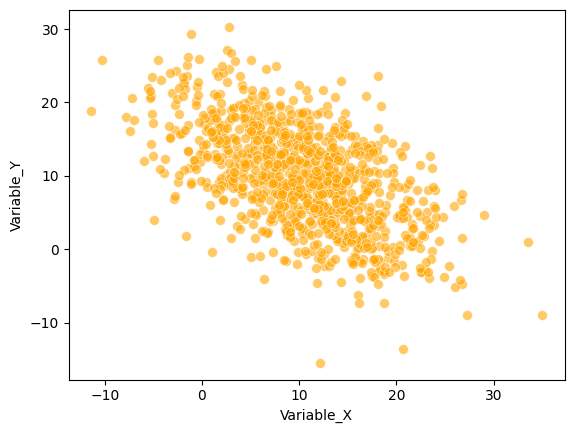

In [18]:
mean = [10, 10]  # X̄ = 50, Ȳ = 30

cov_matrix = [[50, -30],    # Var(X)=25, Cov(X,Y)=15
              [-30, 50]]    # Cov(Y,X)=15, Var(Y)=20

# Generar 1000 observaciones
n_samples = 1000
data_bivariada = np.random.multivariate_normal(mean, cov_matrix, n_samples)

df_bivariada = pd.DataFrame(data_bivariada, columns=['Variable_X', 'Variable_Y'])

sns.scatterplot(data=df_bivariada, x='Variable_X', y='Variable_Y', alpha=0.6, s=50, color='orange')

<Axes: xlabel='Variable_X', ylabel='Variable_Y'>

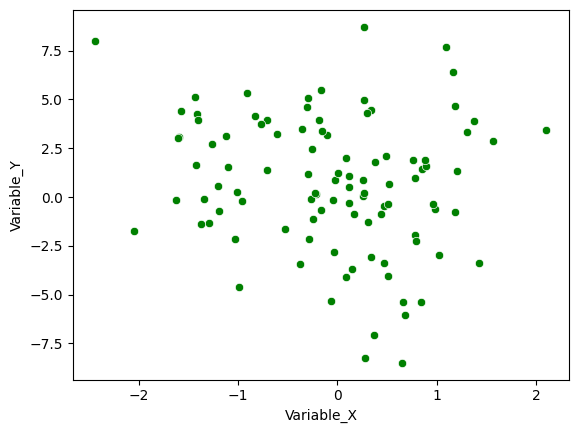

In [22]:
mean = [0, 0]  # X̄ = 50, Ȳ = 30

cov_matrix = [[1, 0],    # Var(X)=25, Cov(X,Y)=15
              [0, 10]]    # Cov(Y,X)=15, Var(Y)=20

# Generar 1000 observaciones
n_samples = 100
data_bivariada = np.random.multivariate_normal(mean, cov_matrix, n_samples)

df_bivariada = pd.DataFrame(data_bivariada, columns=['Variable_X', 'Variable_Y'])

sns.scatterplot(data=df_bivariada, x='Variable_X', y='Variable_Y', color='green')

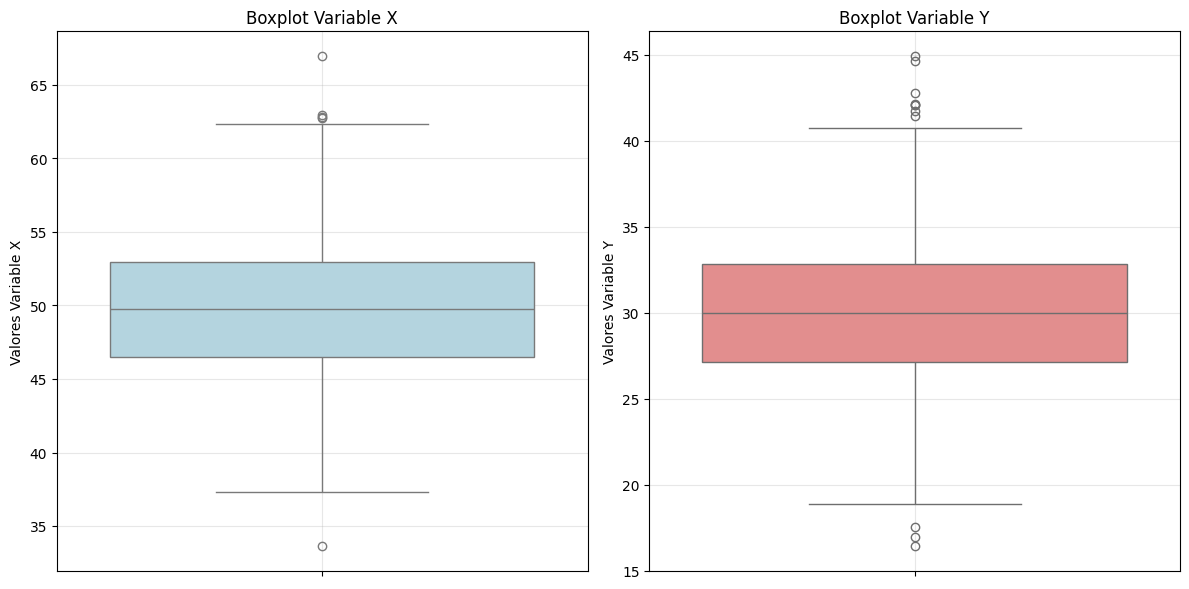

In [33]:
'''f. Genere un boxplot para cada una de las dimensiones de la base de datos creada.'''

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot para Variable X
sns.boxplot(y=df_bivariada['Variable_X'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot Variable X')
axes[0].set_ylabel('Valores Variable X')
axes[0].grid(True, alpha=0.3)

# Boxplot para Variable Y
sns.boxplot(y=df_bivariada['Variable_Y'], ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot Variable Y')
axes[1].set_ylabel('Valores Variable Y')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()